# Model Evaluation

In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

## Cross-Validating Models

In [2]:
digits = datasets.load_digits()
# Create features matrix
features = digits.data
# Create target vector
target = digits.target
# Create standardizer
standardizer = StandardScaler()
# Create logistic regression object
logit = LogisticRegression()
# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)
# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)
# Conduct k-fold cross-validation
cv_results = cross_val_score(pipeline,  # Pipeline
                             features,  # Feature matrix
                             target,  # Target vector
                             cv=kf,  # Cross-validation
                             scoring="accuracy",  # Loss function
                             n_jobs=-1)  # Use all CPU scores
# Calculate mean
cv_results.mean()

0.9693916821849783

In [3]:
from sklearn.model_selection import train_test_split
# Create training and test sets
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)
# Fit standardizer to training set
standardizer.fit(features_train)
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)
pipeline = make_pipeline(standardizer, logit)
cv_results = cross_val_score(pipeline,  # Pipeline
                             features,  # Feature matrix
                             target,  # Target vector
                             cv=kf,  # Cross-validation technique
                             scoring="accuracy",  # Loss function
                             n_jobs=-1)  # Use all CPU scores
cv_results.mean()

0.9693916821849783

## Creating a Baseline Regression Model

In [4]:
from sklearn.dummy import DummyRegressor
boston = datasets.load_boston()
features, target = boston.data, boston.target
# Make test and training split
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=0)
dummy = DummyRegressor(strategy='mean')
# "Train" dummy regressor
dummy.fit(features_train, target_train)
# Get R-squared score
dummy.score(features_test, target_test)


-0.001119359203955339

In [5]:
from sklearn.linear_model import LinearRegression
# Train simple linear regression model
ols = LinearRegression()
ols.fit(features_train, target_train)
# Get R-squared score
ols.score(features_test, target_test)


0.6354638433202145

In [6]:
clf = DummyRegressor(strategy='constant', constant=20)
clf.fit(features_train, target_train)
# Evaluate score
clf.score(features_test, target_test)

-0.06510502029325727

used index: R-Square  
$R^2=\displaystyle\frac{\sum\limits_{i}^{n}(y_i-\hat{y_i})^2}{\sum\limits_{i}^{n}(y_i-\bar{y_i})^2} $

## Creating a Baseline Classfication Model

In [7]:
from sklearn.dummy import DummyClassifier
iris = datasets.load_iris()
features, target = iris.data, iris.target
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)
dummy = DummyClassifier(strategy='uniform', random_state=1)
dummy.fit(features_train, target_train)
dummy.score(features_test, target_test)

0.42105263157894735

In [8]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
# Train model
classifier.fit(features_train, target_train)
# Get accuracy score
classifier.score(features_test, target_test)


0.9736842105263158

## Evaluating Binary Classifier Predictions
used index:  
$Accuracy = \displaystyle\frac{TP+TN}{TP+TN+FP+FN} $
Confusion Matrix:

Group | Positive |Negative
 :--:|:--:|:--:
 Predict Positive| TP  | FP
 Predict Negative| FN  | TN

In [9]:
X, y = datasets.make_classification(n_samples=10000,
                                    n_features=3,
                                    n_informative=3,
                                    n_redundant=0,
                                    n_classes=2,
                                    random_state=1)
logit = LogisticRegression()
cross_val_score(logit, X, y, scoring="accuracy")

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

Sometimes we face imbalanced classes such as cancer, index `Accuracy` cannot be a good index. So another index will be mentioned.  
other index:  
$ Precision = \displaystyle\frac{TP}{TP+FP} $  
Precision is the proportion of every observation predicted to be positive that is actually positive.

In [10]:
cross_val_score(logit, X, y, scoring="precision")

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

index:  
$ Recall = \displaystyle\frac{TP}{TP+FN} $  
Recall is the proportion of every positive observation that is truly positive. Recall measures the model’s ability to identify an observation of the positive class.

In [11]:
cross_val_score(logit, X, y, scoring="recall")

array([0.951, 0.952, 0.953, 0.949, 0.951])

index:  
$ F_1=2\times\displaystyle\frac{Precision\times Recall}{Precision+Recall} $  
It is a measure of correctness achieved in positive prediction—that is, of observations labeled as positive, how many are actually positive.


In [12]:
cross_val_score(logit, X, y, scoring="f1")

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

In [13]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=1)
y_hat = logit.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_hat)

0.947

## Evaluating Binary Classifier Thresholds

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

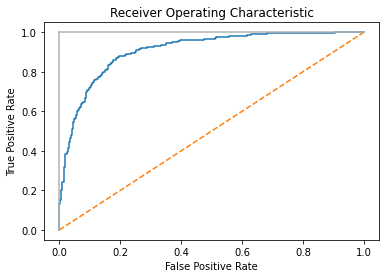

In [15]:
features, target = datasets.make_classification(n_samples=10000,
                                                n_features=10,
                                                n_classes=2,
                                                n_informative=3,
                                                random_state=3)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)
logit = LogisticRegression()
# Train model
logit.fit(features_train, target_train)
# Get predicted probabilities
target_probabilities = logit.predict_proba(features_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [16]:
# Get predicted probabilities
logit.predict_proba(features_test)[0:1]

array([[0.86891533, 0.13108467]])

In [17]:
# which class
logit.classes_

array([0, 1])

question what does 'threshold' mean in this part?  
By default, scikit-learn predicts an observation is part of the positive class if the probability is greater than 0.5 (called the *threshold*).

In [18]:
print("Threshold:", threshold[116])
print("True Positive Rate:", true_positive_rate[116])
print("False Positive Rate:", false_positive_rate[116])

Threshold: 0.5331715230155317
True Positive Rate: 0.810204081632653
False Positive Rate: 0.14901960784313725


In [19]:
# increase the threshold to 80%, we get both TPR and FPR decreased
print("Threshold:", threshold[45])
print("True Positive Rate:", true_positive_rate[45])
print("False Positive Rate:", false_positive_rate[45])

Threshold: 0.818913387665929
True Positive Rate: 0.5448979591836735
False Positive Rate: 0.047058823529411764


What is TPR and FPR ?  
The true positive rate is the number of observations correctly
predicted true divided by all true positive observations:
$$ TPR=\displaystyle\frac{\text{True Positive}}{\text{False Negative}+\text{True Positive}} $$
The false positive rate is the number of incorrectly predicted positives divided by all true negative observations:
$$ FPR=\displaystyle\frac{\text{False Positive}}{\text{False Positive}+\text{True Negative}} $$


## Evaluating Multiclass Classfier Predictions

In [21]:
features, target = datasets.make_classification(n_samples=10000,
                                       n_features=3,
                                       n_informative=3,
                                       n_redundant=0,
                                       n_classes=3,
                                       random_state=1)
# Create logistic regression
logit = LogisticRegression()
# Cross-validate model using accuracy
cross_val_score(logit, features, target, scoring='accuracy')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

In [22]:
cross_val_score(logit, features, target, scoring='f1_macro')

array([0.84061272, 0.82895312, 0.82625661, 0.81515121, 0.81992692])

## Visualizing a Classifier's Performance

In [23]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

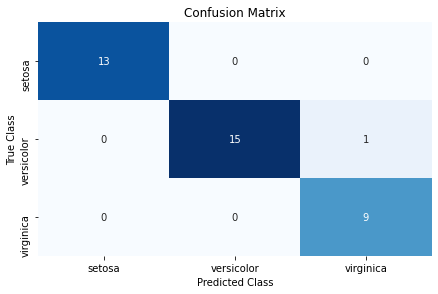

In [26]:
features, target = iris.data, iris.target
class_names = iris.target_names
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)
classfier = LogisticRegression()
target_predicted = classifier.fit(features_train, target_train).predict(features_test)
matrix = confusion_matrix(target_test, target_predicted)
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, cbar=None,cmap="Blues")
plt.title("Confusion Matrix"),plt.tight_layout()
plt.ylabel("True Class"),plt.xlabel("Predicted Class")
plt.show()

## Evaluating Regression Models

In [27]:
features, target = datasets.make_regression(n_samples=100,
                                   n_features=3,
                                   n_informative=3,
                                   n_targets=1,
                                   noise=50,
                                   coef=False,
                                   random_state=1)
ols = LinearRegression()
cross_val_score(ols, features, target, scoring='neg_mean_squared_error')

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

In [29]:
cross_val_score(ols, features, target, scoring='r2')

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

MSE is a common evaluation metrics for regression models.  
$$ \text{MSE} = \displaystyle\frac{1}{n}\sum\limits_{i=1}^{n}(\hat{y}_i-y_i)^2 $$

## Evaluating Clustering Models

In [31]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

features, _ = datasets.make_blobs(n_samples=1000, n_features=10,
                         centers=2, cluster_std=0.5,
                         shuffle=True,
                         random_state=1)
model = KMeans(n_clusters=2, random_state=1).fit(features)
target_predicted = model.labels_
silhouette_score(features, target_predicted)

0.8916265564072142

## Creating a Custom Evaluation Metric

In [32]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.linear_model import Ridge

features, target = datasets.make_regression(n_samples=100,
                                            n_features=3,
                                            random_state=1)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.10, random_state=1)

def custom_metric(target_test, target_predicted):
    r2 = r2_score(target_test, target_predicted)
    return r2

score = make_scorer(custom_metric, greater_is_better=True)
classifier = Ridge()
model = classifier.fit(features_train, target_train)
score(model, features_test, target_test)

0.9997906102882058

## Visualizing the Effect of Training Set Size

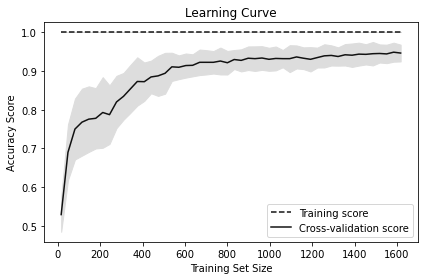

In [33]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
# Load data
digits = load_digits()
# Create feature matrix and target vector
features, target = digits.data, digits.target
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(
    # Classifier
    RandomForestClassifier(),
    # Feature matrix
    features,  # Target vector
    target,  # Number of folds
    cv=10,  # Performance metric
    scoring='accuracy',  # Use all computer cores
    n_jobs=-1,  # Sizes of 50
    train_sizes=np.linspace(0.01, 1.0, 50)
)
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",
         label="Training score")
plt.plot(train_sizes, test_mean, color="#111111",
         label="Cross-validation score")
# Draw bands
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Creating a Text Report of Evaluation Metrics

In [34]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# Load data
iris = datasets.load_iris()
# Create feature matrix
features = iris.data
# Create target vector
target = iris.target
# Create list of target class names
class_names = iris.target_names
# Create training and test set
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=1)
# Create logistic regression
classifier = LogisticRegression()
# Train model and make predictions
model = classifier.fit(features_train, target_train)
target_predicted = model.predict(features_test)
# Create a classification report
print(classification_report(target_test,
                            target_predicted,
                            target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



D:\software\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Visualizing the Effect of Hyperparameter Values

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

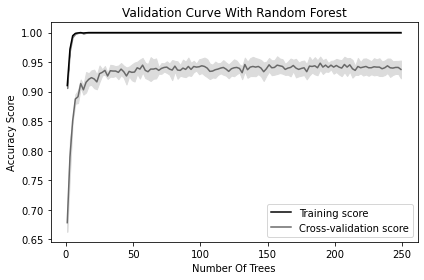

In [38]:
digits = load_digits()
# Create feature matrix and target vector
features, target = digits.data, digits.target
# Create range of values for parameter
param_range = np.arange(1, 250, 2)
# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(
    # Classifier
    RandomForestClassifier(),
    # Feature matrix
    features,
    # Target vector
    target,
    # Hyperparameter to examine
    param_name="n_estimators",
    # Range of hyperparameter's values
    param_range=param_range,
    # Number of folds
    cv=3,
    # Performance metric
    scoring="accuracy",
    # Use all computer cores
    n_jobs=-1)
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score",
         color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")
# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, color="gainsboro")
# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()